## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_extraction, model_selection, metrics
from sklearn import naive_bayes, tree, linear_model
import xgboost

## Loading and checking train data

In [2]:
#Loading and checking train data

train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
print(train.size)
train.head(10)

38065


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
#Loading and checking test data

test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
print(test.size)
test.head(10)

13052


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


## Data Exploration

In [4]:
#Removing duplicates from train data

print(len(train))
train = train.drop_duplicates('text')
print(len(train))

7613
7503


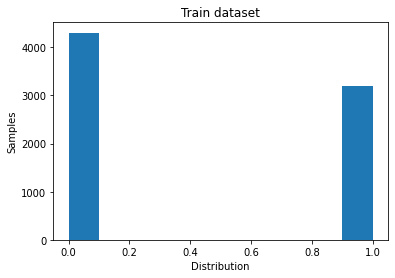

In [5]:
#Checking distribution of falses and positives in train data

plt.title('Train dataset')
plt.xlabel('Distribution')
plt.ylabel('Samples')
plt.hist(train.target)
plt.show()

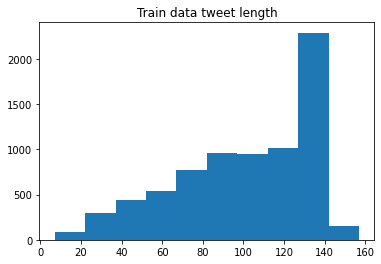

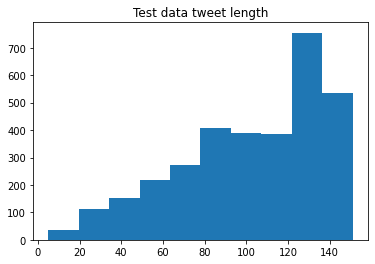

In [6]:
#Exploring test and train tweet lengths for possible useful information

tweet_lengths_train=map(lambda x:len(x),train['text'])
plt.title('Train data tweet length')
plt.hist(list(tweet_lengths_train))
plt.show()

tweet_lengths_test=map(lambda x:len(x),test['text'])
plt.title('Test data tweet length')
plt.hist(list(tweet_lengths_test))
plt.show()

<AxesSubplot:xlabel='count', ylabel='keyword'>

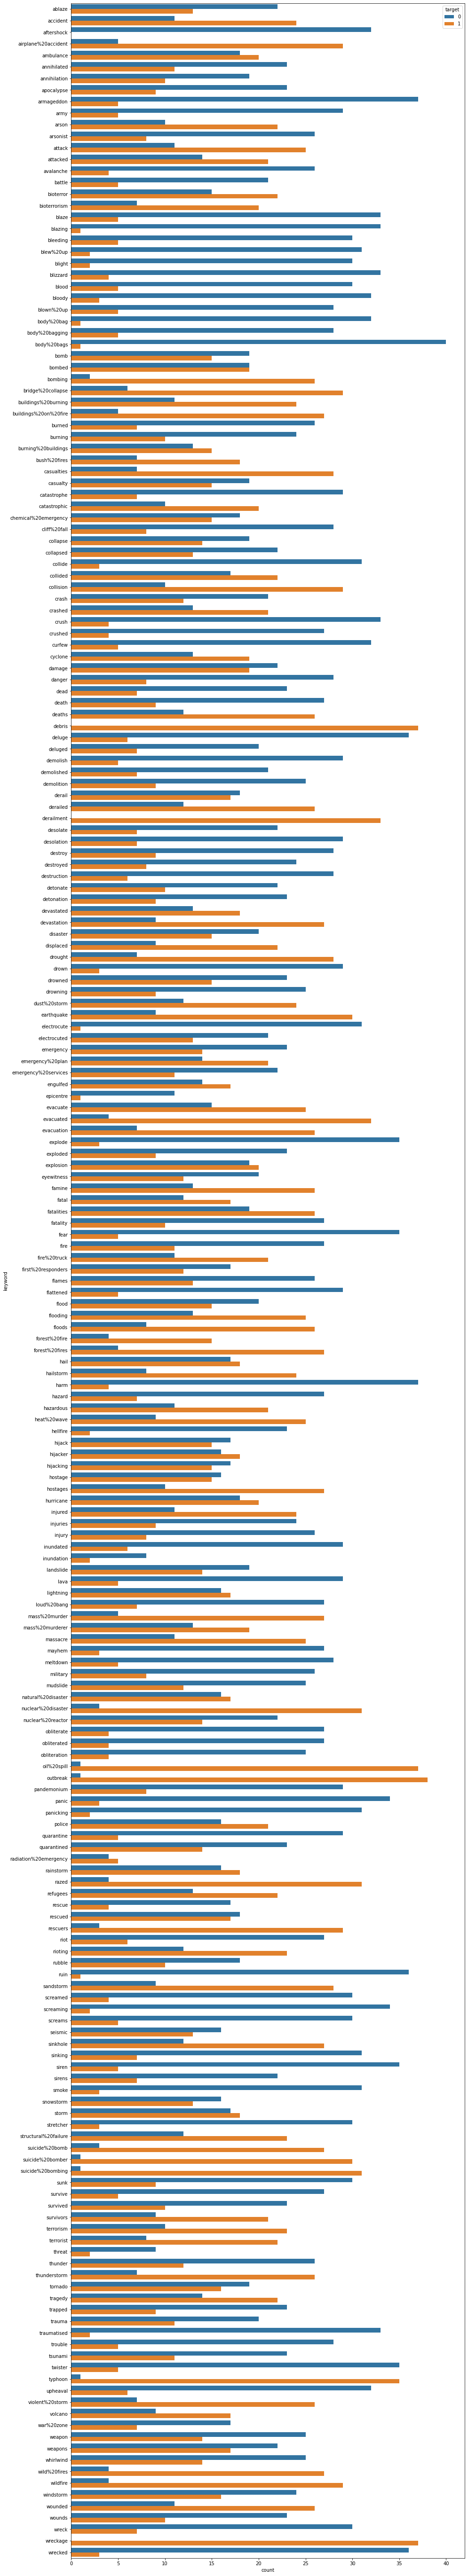

In [7]:
import seaborn as sns

#Exploring the keyword column in train dataset

plt.figure(figsize=(15,100))
sns.countplot(data=train, y='keyword', hue='target')

## Data preprocessing

In [8]:
#Removing hashtags

train['text'] = train['text'].str.replace("#", "").replace("_", " ")

train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive wildfires evacuation ord...",1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
5,8,NaN,NaN,RockyFire Update => California Hwy. 20 closed ...,1
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [9]:
#Installing preprocessor

!pip install tweet-preprocessor

In [10]:
#Importing preprocessor and defining preprocess function

import preprocessor as p

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [11]:
#Cleaning train dataset

train['text'] = train.apply(preprocess_tweet, axis=1)

train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in ...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
5,8,NaN,NaN,RockyFire Update => California Hwy. closed in ...,1
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [12]:
#Importing gensim library for stopwords removal and adding a function

#from gensim.parsing.preprocessing import remove_stopwords

#def stopword_removal(row):
#    text = row['text']
#    text = remove_stopwords(text)
#    return text

In [13]:
#Applying function to remove stopwords

#train['text'] = train.apply(stopword_removal, axis=1)

#train.head(10)

In [14]:
#Removing stopwords using nltk

from nltk.corpus import stopwords
stop = stopwords.words('english')

train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked 'shelter place' notified o...,1
3,6,NaN,NaN,people receive wildfires evacuation orders Cal...,1
4,7,NaN,NaN,Just got sent photo Ruby Alaska smoke wildfire...,1
5,8,NaN,NaN,RockyFire Update => California Hwy. closed dir...,1
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1
7,13,NaN,NaN,I'm top hill I see fire woods...,1
8,14,NaN,NaN,There's emergency evacuation happening buildin...,1
9,15,NaN,NaN,I'm afraid tornado coming area...,1


In [15]:
#Removing extra white spaces and punctuation, and applying lowercase

train['text'] = train['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

train.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,keyword,location,text,target
0,1,NaN,NaN,our deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place notified off...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,just got sent photo ruby alaska smoke wildfire...,1
5,8,NaN,NaN,rockyfire update california hwy closed directi...,1
6,10,NaN,NaN,flood disaster heavy rain causes flash floodin...,1
7,13,NaN,NaN,i m top hill i see fire woods,1
8,14,NaN,NaN,there s emergency evacuation happening buildin...,1
9,15,NaN,NaN,i m afraid tornado coming area,1


### Preprocessing for Keras

In [16]:
#Removing columns which will not be used

X = train['text']

y = train['target']

print(X.head(10))

print(y.head(10))

0     our deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    all residents asked shelter place notified off...
3    people receive wildfires evacuation orders cal...
4    just got sent photo ruby alaska smoke wildfire...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                       i m top hill i see fire woods 
8    there s emergency evacuation happening buildin...
9                      i m afraid tornado coming area 
Name: text, dtype: object
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64


In [17]:
#Tokenization

#tokenizer = keras.preprocessing.text.Tokenizer()
#tokenizer.fit_on_texts(X)
#X = tokenizer.texts_to_sequences(X)

#pd.DataFrame(X[:10])


In [18]:
#Padding

#X = keras.preprocessing.sequence.pad_sequences(X, maxlen=20, padding="post")

#pd.DataFrame(X[:10])

In [19]:
#Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['text'])

### Wrapping up


In [20]:
from nltk.corpus import stopwords
import preprocessor as p

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text


def process_x_dataframe(df):    
    #Removing hashtags
    train['text'] = train['text'].str.replace("#", "").replace("_", " ")
    
    #Cleaning train dataset
    train['text'] = train.apply(preprocess_tweet, axis=1)

    #Removing stopwords using nltk
    stop = stopwords.words('english')    
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    #Removing extra white spaces and punctuation, and applying lowercase
    df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
    
    
    #Removing columns which will not be used
    X = df['text']

    #Tokenization
    tokenizer = keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)
    
    
    #Padding
    X = keras.preprocessing.sequence.pad_sequences(X, maxlen=20, padding="post")
    return X

## Building and testing models

In [21]:
#Split into train and test slices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print(X_train.shape)

print(X_test.shape)

(6002, 14694)
(1501, 14694)


## Ridge Classifier

train accuracy: 0.9843385538153949 
 test accuracy: 0.7781479013990673


classification report for Ridge Classifier
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       852
           1       0.78      0.69      0.73       649

    accuracy                           0.78      1501
   macro avg       0.78      0.77      0.77      1501
weighted avg       0.78      0.78      0.78      1501



confusion matrix for ridge classifier


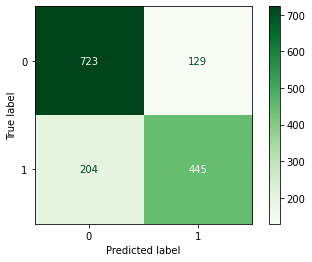

In [22]:
from sklearn import linear_model, metrics

rc = linear_model.RidgeClassifier()
model0 = rc.fit(X_train, y_train)
print("train accuracy:",model0.score(X_train, y_train),"\n","test accuracy:",model0.score(X_test,y_test))

rcpred = rc.predict(X_test)
print("\n")
print("classification report for Ridge Classifier")
print(metrics.classification_report(y_test,rcpred))
print("\n")
print("confusion matrix for ridge classifier")
metrics.ConfusionMatrixDisplay.from_estimator(rc, X_test, y_test,cmap="Greens")

## Logistic Regression

train accuracy: 0.9580139953348884 
 test accuracy: 0.7941372418387741


classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       852
           1       0.80      0.70      0.75       649

    accuracy                           0.79      1501
   macro avg       0.79      0.78      0.79      1501
weighted avg       0.79      0.79      0.79      1501



confusion matrix for logistic regression


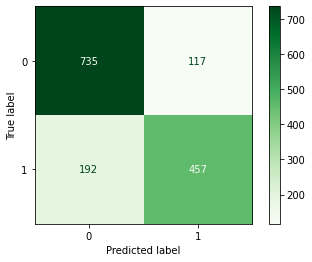

In [23]:
lr = linear_model.LogisticRegression(max_iter = 2000,penalty = 'l2')
model1 = lr.fit(X_train, y_train)
print("train accuracy:",model1.score(X_train, y_train),"\n","test accuracy:",model1.score(X_test,y_test))
lrpred = lr.predict(X_test)
print("\n")
print("classification report for Logistic Regression")
print(metrics.classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
metrics.ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test,cmap="Greens")

## XGB

train accuracy: 0.8352215928023992 
 test accuracy: 0.7854763491005996


classification report for XGB
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       852
           1       0.84      0.62      0.72       649

    accuracy                           0.79      1501
   macro avg       0.80      0.77      0.77      1501
weighted avg       0.79      0.79      0.78      1501



confusion matrix for XGB


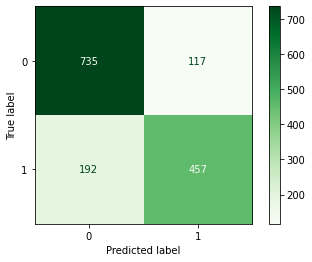

In [24]:
xgb = xgboost.XGBClassifier()
model2 = xgb.fit(X_train, y_train)
print("train accuracy:",model2.score(X_train, y_train),"\n","test accuracy:",model2.score(X_test,y_test))
xgbpred = xgb.predict(X_test)
print("\n")
print("classification report for XGB")
print(metrics.classification_report(y_test,xgbpred))
print("\n")
print("confusion matrix for XGB")
metrics.ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test,cmap="Greens")

## Bernouilli NB

train accuracy: 0.8980339886704432 
 test accuracy: 0.8121252498334444


classification report for Bernouilli NB
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       852
           1       0.86      0.67      0.76       649

    accuracy                           0.81      1501
   macro avg       0.82      0.80      0.80      1501
weighted avg       0.82      0.81      0.81      1501



confusion matrix for Bernouilli NB


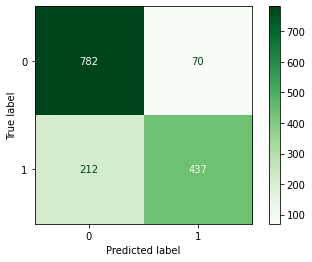

In [25]:
bernouilli_nb = naive_bayes.BernoulliNB()
model3 = bernouilli_nb.fit(X_train, y_train)
print("train accuracy:",model3.score(X_train, y_train),"\n","test accuracy:",model3.score(X_test,y_test))
bernouilli_nbpred = bernouilli_nb.predict(X_test)
print("\n")
print("classification report for Bernouilli NB")
print(metrics.classification_report(y_test,bernouilli_nbpred))
print("\n")
print("confusion matrix for Bernouilli NB")
metrics.ConfusionMatrixDisplay.from_estimator(bernouilli_nb, X_test, y_test,cmap="Greens")

## Gaussian NB

train accuracy: 0.8980339886704432 
 test accuracy: 0.6175882744836776


classification report for Gaussian NB
              precision    recall  f1-score   support

           0       0.77      0.47      0.58       852
           1       0.54      0.82      0.65       649

    accuracy                           0.62      1501
   macro avg       0.65      0.64      0.61      1501
weighted avg       0.67      0.62      0.61      1501



confusion matrix for Gaussian NB


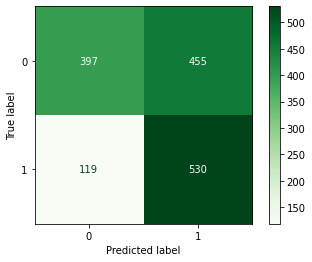

In [26]:
gaussian_nb = naive_bayes.GaussianNB()
model4 = gaussian_nb.fit(X_train.toarray(), y_train)
print("train accuracy:",model3.score(X_train.toarray(), y_train),"\n","test accuracy:",model4.score(X_test.toarray(),y_test))
gaussian_nbpred = gaussian_nb.predict(X_test.toarray())
print("\n")
print("classification report for Gaussian NB")
print(metrics.classification_report(y_test,gaussian_nbpred))
print("\n")
print("confusion matrix for Gaussian NB")
metrics.ConfusionMatrixDisplay.from_estimator(gaussian_nb, X_test.toarray(), y_test,cmap="Greens")

## Complement NB

train accuracy: 0.9121959346884372 
 test accuracy: 0.798800799467022


classification report for Complement NB
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       852
           1       0.78      0.75      0.76       649

    accuracy                           0.80      1501
   macro avg       0.80      0.79      0.79      1501
weighted avg       0.80      0.80      0.80      1501



confusion matrix for Complement NB


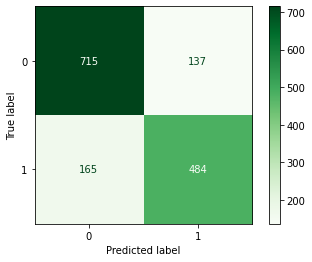

In [27]:
complement_nb = naive_bayes.ComplementNB()
model5 = complement_nb.fit(X_train, y_train)
print("train accuracy:",model5.score(X_train, y_train),"\n","test accuracy:",model5.score(X_test,y_test))
complement_nbpred = complement_nb.predict(X_test)
print("\n")
print("classification report for Complement NB")
print(metrics.classification_report(y_test,complement_nbpred))
print("\n")
print("confusion matrix for Complement NB")
metrics.ConfusionMatrixDisplay.from_estimator(complement_nb, X_test, y_test,cmap="Greens")

## Decision Tree

train accuracy: 0.9896701099633456 
 test accuracy: 0.7628247834776816


classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       852
           1       0.73      0.71      0.72       649

    accuracy                           0.76      1501
   macro avg       0.76      0.76      0.76      1501
weighted avg       0.76      0.76      0.76      1501



confusion matrix for Decision Tree


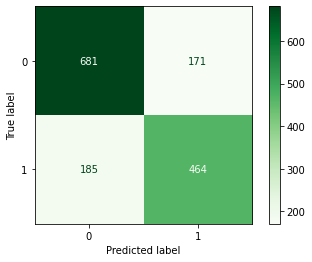

In [28]:
dectree = tree.DecisionTreeClassifier()
model6 = dectree.fit(X_train, y_train)
print("train accuracy:",model6.score(X_train, y_train),"\n","test accuracy:",model6.score(X_test,y_test))
dectreepred = dectree.predict(X_test)
print("\n")
print("classification report for Decision Tree")
print(metrics.classification_report(y_test,dectreepred))
print("\n")
print("confusion matrix for Decision Tree")
metrics.ConfusionMatrixDisplay.from_estimator(dectree, X_test, y_test,cmap="Greens")

## Preparing submission

In [29]:
clf = naive_bayes.BernoulliNB()

X_test = vectorizer.transform(test['text'])
    
# Fit & forecast
clf.fit(X, y)
y_pred = clf.predict(X_test)
    
# Export
submission = pd.DataFrame(data={'id'   : test['id'], 'target': y_pred})
submission.to_csv('submission.csv', index = False)
submission = pd.read_csv('submission.csv')

submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
